# Ch. 5: Support Vectors Machines

***
***

**Support Vector Machines**:
- Powerful AF
- Linear or nonlinear...
 - Classification
 - Regression
 - Outlier detection
- Useful for...
 - Small/medium sized datasets
 - Complex data or lots of features

***

## 5.1 - SVM Classification

### 5.1.1 - Linear Classification

#### 5.1.1.1 - Large Margin Classification

**Large margin classification**: Draw decision boundary as equidistant and orthogonal to the vector that connects two closest class instances

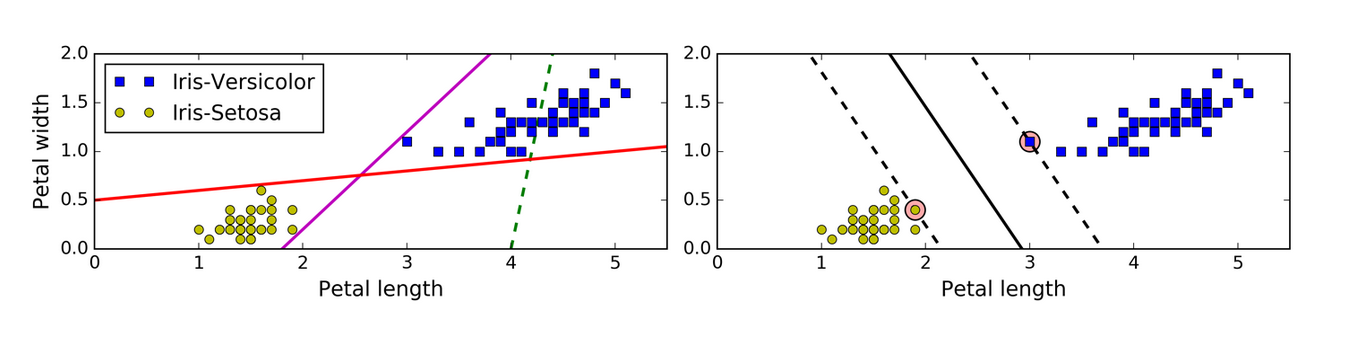

Dashed lines are called "on-the-street" and the SVM classifier tries to fit the widest possible street.

More training "off-the-street" does not affect this decision boundary (fully determined). 

**Support Vectors**: The ones that determine the boundaries of the "street"

**Support Vectors and their subsequent "streets" are very sensitive to SCALING**:

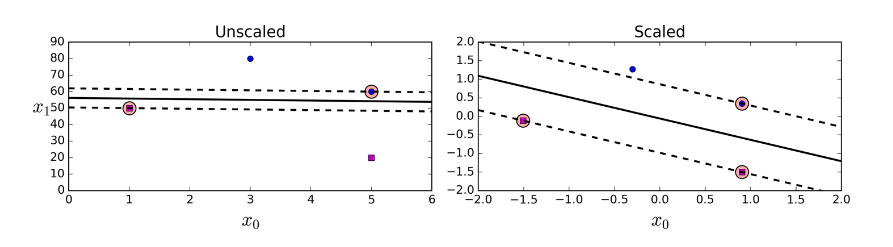

#### 5.1.1.2 Soft Margin Classification

**Soft Margin Classification**: Drawing the street boundary such that we do not demand ALL instances be on the "correct" side of the street.

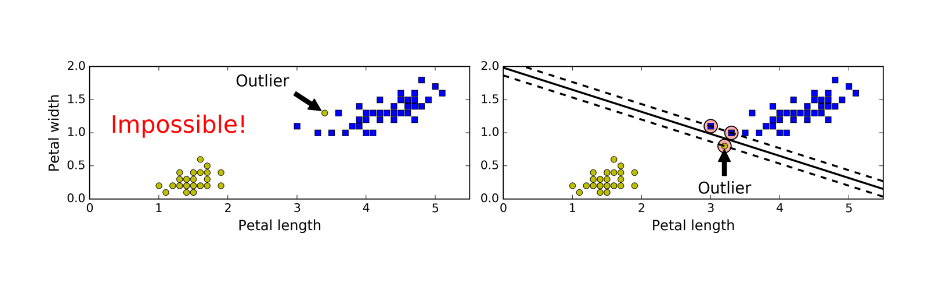

It is very sensitive to outliers/noise (if not impossible to draw boundaries)

Goals of soft margin classification...

- keep street as large as possible
- limit _margin violations_
 - instances in middle
 - instances on wrong side
 
In Scikit-Learn, _margin violations_ controlled by hyperparameter **C**
- Larger **C** = wider street, more margin violations
- Smaller **C** = narrower street, less margin violations
- see below for an example of **C** in action (reduce **C** to help mitigate overfitting)

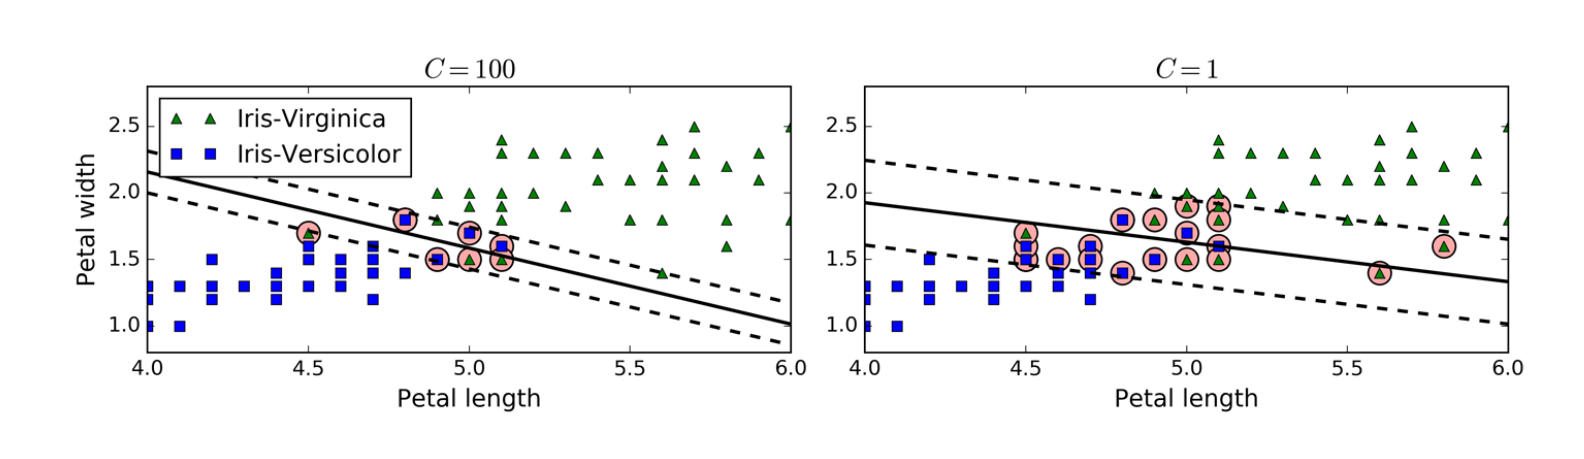

#### 5.1.1.3 Example of Linear SVM Classification in Scikit-Learn

We'll try it on the iris dataset. Keep in mind that SVMs do not output probabilities for particular classes.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris-Virginica

    svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge"))
    ])

svm_clf.fit(X, y)

svm_clf.predict([[5.5, 1.7]])

Other implementations of SVC classification:

- Use _SVC_ class and set the kernel to "linear", but it's slower.
- Use _SGDClassifier_ class with...
 - loss="hinge"
 - alpha=(1/(m*C))
 - Applies SGD to train linear SVM classifier
 - Useful for huge datasets

NOTE: LinearSVC class regularizes bias term. Center dataset by subtracting its mean (automatically done w/ _StandardScaler_. _loss_ hyperparameter "hinge" must be set. 

### 5.1.2 Nonlinear SVM Classification

#### 5.1.2.1 Nonlinear SVM Introduction

- Many datasets not linearly separable
- Could add features
 - Remember adding polynomial features in Ch. 4?
 - Some cases result in linear separable datasets
 
 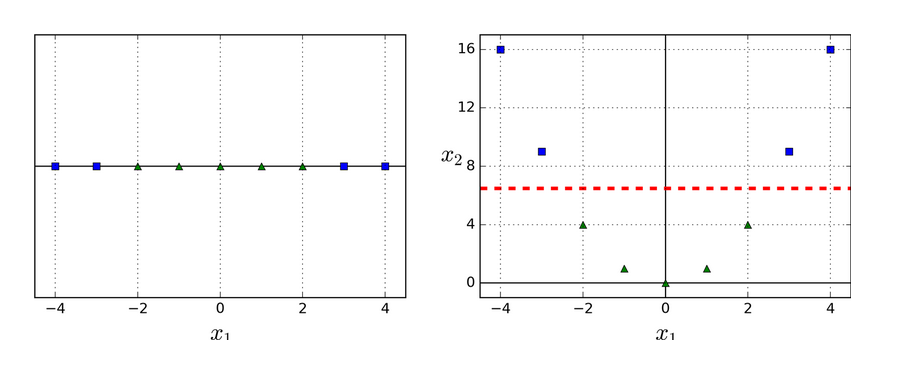
 
#### 5.1.2.1 Nonlinear SVM Implementation via Polynomial Feature Generation

Implementing polynomial feature generation...

- Create _Pipeline_
- Define a _PolynomialFeatures_ transformer
- Implement _StandardScaler_
- Call a LinearSVC class

Try it with "moons" dataset (example dataset used for binary classification. as seen below):

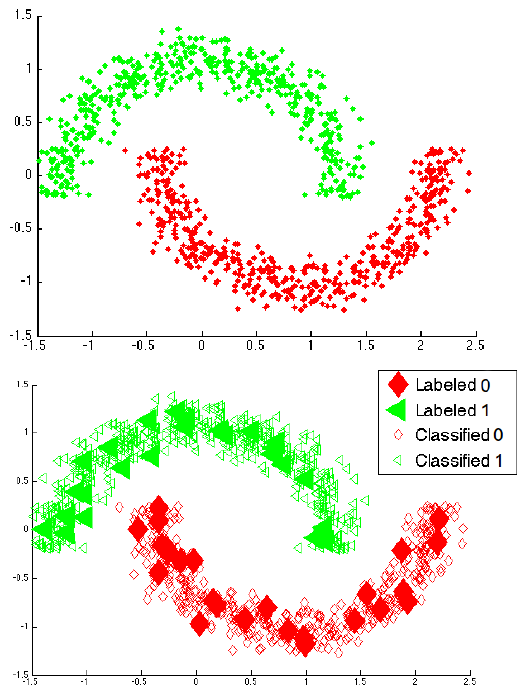

We will define the _Pipeline_ as we did above...

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)

- Pros of adding polynomial features:
 - Easy to implement
 - Can work great w/ other ML algorithms to test
- Cons of adding polynomial features:
 - @ low polynomial degrees, can't handle complex datasets (makes the model far too slow

TODO: Now, as an exercise, we can try to plot the classified data.

#### 5.1.2.2 Nonlinear SVM via Polynomial Kernal

**Kernel Trick**: 
 - Gives the same result as adding a high degree of polynomial features w/o having to actually add them
  - No combinatorial explosion

In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X, y)

- Code above trains SVM classifier w/ 3rd degree polynomial kernel
- If overfitting, reduce polynomial degree
- If underfitting, increase polynomial degree
- Hyperparameter _coef0_ controls influence of higher degree polynomials v. lower degree polynomials
 - Coarse grid search to start to find proper value
 - Finer grid search after the first
 - Get a sense of what it controls to aid search
 
 
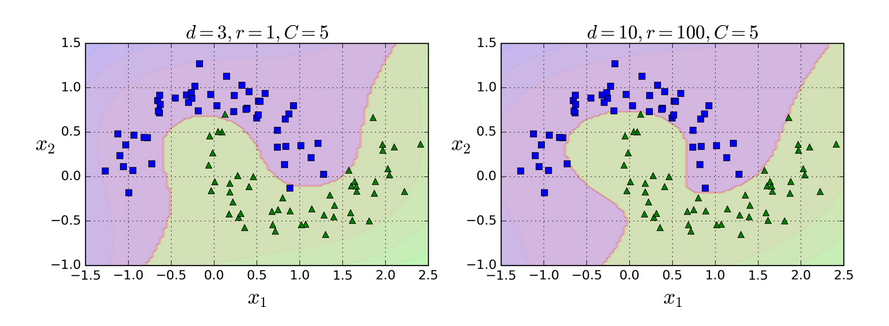

#### 5.1.2.3 Nonlinear SVM w/ Similarity Features

**Similarity Function**: A measure of how much each instance resembles a _landmark_

Example of a similarity function, _Gaussian Radical Basis Function (RBF)_:

$$ \phi_{\gamma}(\textbf{x}, C) = e^{-\gamma || \textbf{x} - C ||^2}$$

Bell shaped function
- 0 = far from landmark
- 1 = at the landmark

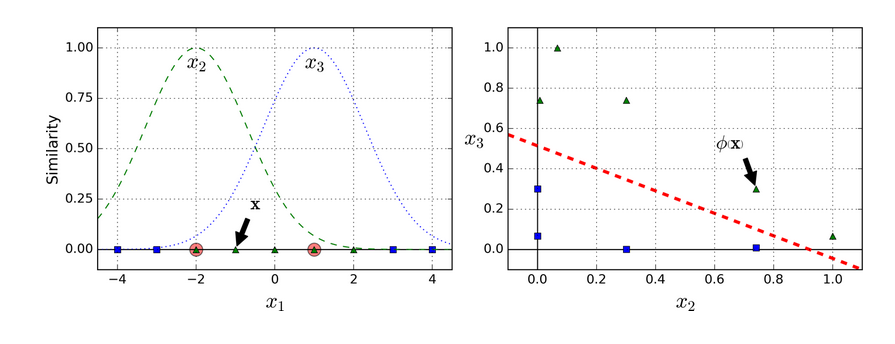

How to select landmarks?
- Simple approach: landmark @ each instance in dataset
 - Create many dimensions and increases chances that transformed data set is linearly separable
 - Given _m_ instances w/ _n_ freatures, create a new dataset w/ _n_ + _m_ features.
 - If training set is very large, end up w/ huge number of features
 
#### 5.1.2.4 Nonlinear SVM w/ Gaussian RBF Kernel

- Can be useful with any ML algorithm
- Computationally expensive to compute all additional features (esp. given large data sets)
- Like kernel trick before, similar result to many similarity features w/o adding them

In [ ]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])
rbf_kernel_svm_clf.fit(X, y)

$\gamma$ and $C$ act as hyperparameters:
- Overfitting, reduce both.
- Underfitting, increase both.

Example of classifiers w/ different $\gamma$ and $C$ values:

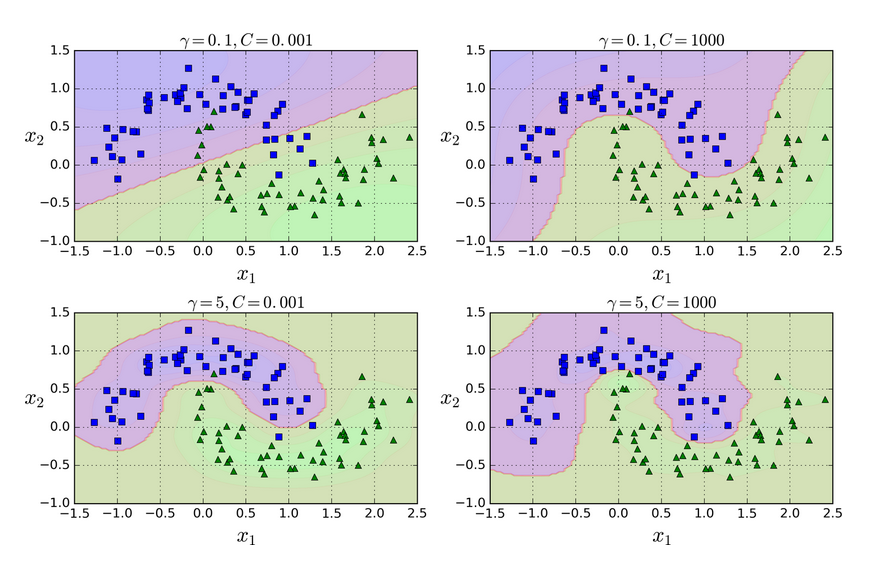

#### 5.1.2.5 Nonlinear SVM - other kernels

Try linear first. Then try Gaussian RBF. If they don't work well and you have spare time, try....

- _String_ kernel: (use _string sub-sequence kernel_... based on _Levenshtein_ distance) Can be used for classifying...
 - Text docs
 - DNA sequences
- Look up kernels specific to the data structures you may be able to use
- Attempt other kernels w/ cross-validation or grid search based on said data structures (if you have the spare computing power)

### 5.1.3 - Computational Complexity

- _LinearSVC_ Class:
 - Optimized algorithm for linear SVMs.
 - No support of kernel trick
 - $O(m \times n)$
  - _m_: # of instances
  - _n_: # of features
 - Precision controlled by hyperparameter _tolerance_
  - Called _tol_ in Scikit-Learn
  - Default usually fine in most classifications
  
- _SVC_ Class:
 - Supports kernel trick
 - $O(m^{2} \times n)$ or $O(m^{3} \times n)$
 - Horrifically slow when instances in hundreds of thousands
 - Great for small/medium complex datasets 
  - scales well w/ lots of features
  - great for _sparse feature population_ (few nonzero features)
  
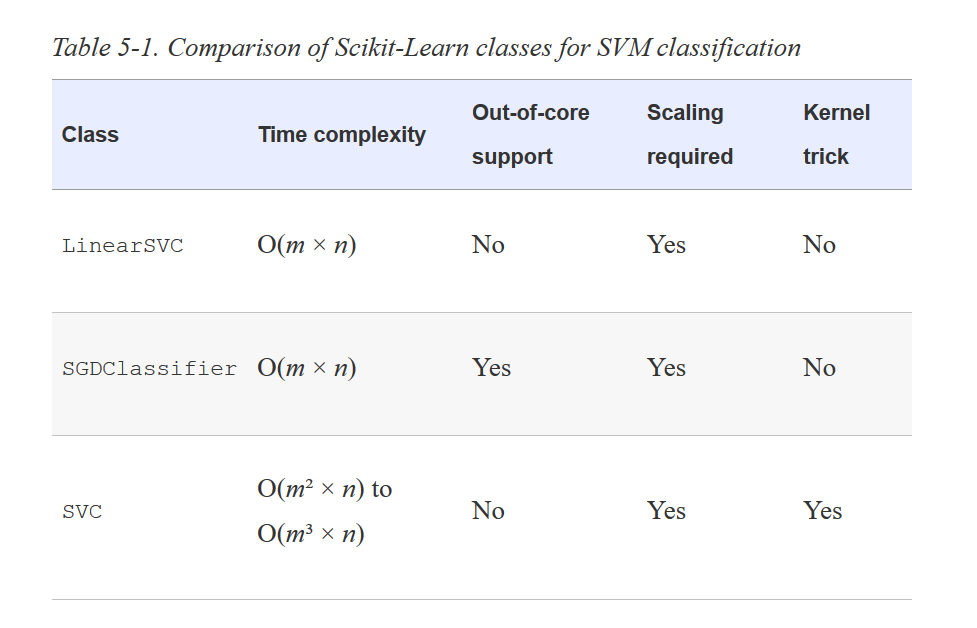



## 5.2 SVM Regression

- Reverse objective of classification
 - Fit as many instances as possible _on_ the street
 - Still try to imit margin violations (instances _off_ the street)
 - Hyperparameter $\epsilon$: controls width of street

### 5.2.1 Linear SVM Regression

Example of linear SVM w/ different $\epsilon$ values seen below:
 
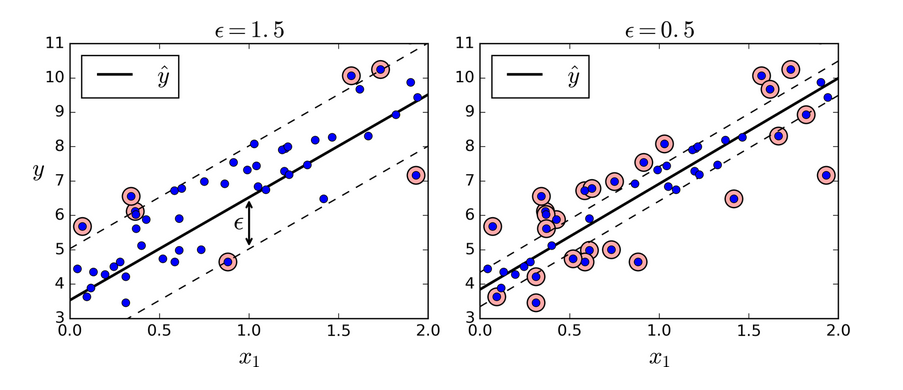

More training instances do not affect model predictions ($\epsilon$ insensitive)

In [ ]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X, y)

### 5.2.1 Nonlinear SVM Regression

- Use kernelized SVM model
- Similar procedure to SVM for classification
- Can be used for outlier detection (just look up SVM for outlier det. in Scikit-Learn documentation)

Example of controlling kernel w/ hyperparameters seen below:

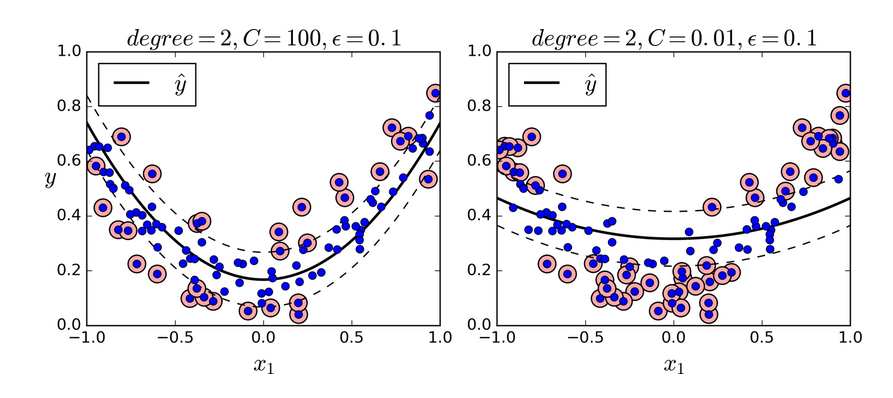

Implemented as follows:

In [ ]:
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel="poly", degree=2, C=100, epsilon=0.1)
svm_poly_reg.fit(X, y)

***

## 5.3 Mathematical Basis for SVM

Using a different convention:

- $b$: bias term
- $\textbf{w}$: feature weights vector
- No bias feature added to input feature vectors

### 5.3.1 Decision Function and Predictions

Given an instance w/ feature vector $\textbf{x}$, linear SVM classifier predicts by calculating:

$$ \textbf{w}^{T}\textbf{x} + b = w_{1}x{1} + ... + w_{n}x_{n} + b $$

$$ \hat{y} = 
    \begin{cases} 
        0 & \text{if $(\textbf{w}^{T}\textbf{x} + b) < 0$} \\
        1 & \text{if $(\textbf{w}^{T}\textbf{x} + b) \geq 0$}
    \end{cases}
$$

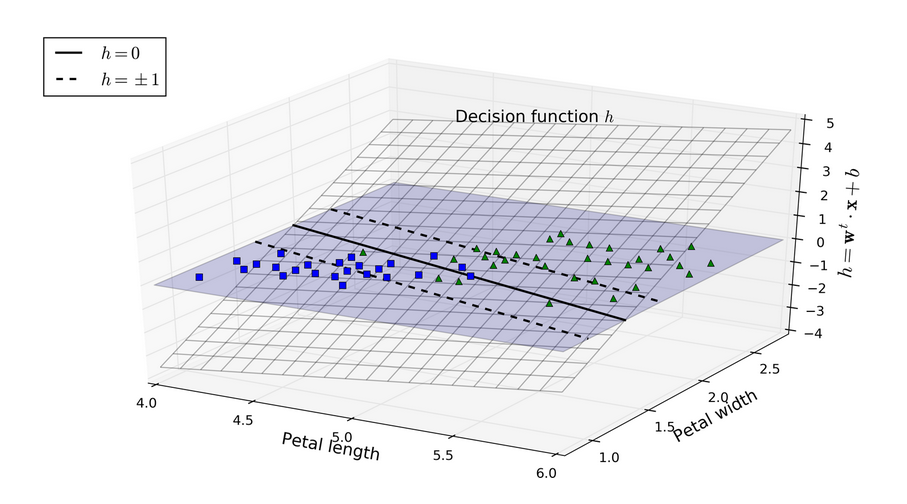

Dashed lines:
- Decision function is +/- 1
- Parallel and equidistant to decision boundary

GOAL OF  TRAINING SVM CLASSIFIER:
- Find value of $\textbf{w}$
- Find value of b
- Make margin as wide as possible 
- Avoid/limit margin violations

### 5.3.2 Training Objectives

Look at the slope of the plane above. Now think about the edge cases:

- Almost perpendicular to plane of the data: Dashed lines (+/- 1 decision function) takes up no room 
- Almost parallel to plane of the data: Have to travel very far to reach +/- 1 on the decision function

Slope: $||\textbf{w}||$

Dividing slope by two, +/- lines will be twice as far from decision boundary.

GOAL 1:

MINIMIZING $||\textbf{w}||$ GIVES LARGEST MARGIN

GOAL 2:

MINIMIZE NUMBER OF MARGIN VIOLATIONS.

How do we combine these two goals?

Define...

$$ t^{(i)} = 
    \begin{cases} 
        -1 & \text{if $y^{(i)} = 0$} \\
        1 & \text{if $y^{(i)} = 1$}
    \end{cases}
$$

**CONSTRAINT DEFINITION**:

$$ \boxed{t^{(i)}(\textbf{w}^{T}\textbf{x}^{(i)} + b) \geq 1} $$

#### 5.3.2.1 Hard Margin Optimization

$$ \boxed{ \min\limits_{\textbf{w},b} \frac{1}{2}\textbf{w}^{T}\textbf{w} \\
\text{subject to} \, t^{(i)}(\textbf{w}^{T}\textbf{x}^{(i)} + b) \geq 1 \, \text{for $i=1, 2, \cdots , m$}} $$

We know that $ \frac{1}{2}\textbf{w}^{T}\textbf{w} =  \frac{1}{2}||\textbf{w}||^{2} $, and that is what we are minimizing. We can differentiate this (it is just $\textbf{w}$, and set it equal to zero to find the min.

#### 5.3.2.2 Soft Margin Optimization

_Slack variable_ $(\zeta^{(i)} \geq 0)$: Measures how much ith instance is allowed to violate the margin

Make slack variable as small as possible to reduce margin violations and make magnitude of weight vector as small as possible to widen the street.

$$ \boxed{ \min\limits_{\textbf{w},b,\zeta} \frac{1}{2}\textbf{w}^{T}\textbf{w} + C \sum_{i=1}^{m} \zeta^{(i)} \\
\text{subject to} \, t^{(i)}(\textbf{w}^{T}\textbf{x}^{(i)} + b) \geq 1 - \zeta^{(i)}\, \text{and}\, \zeta^{(i)} \geq \, \text{for $i=1, 2, \cdots , m$}} $$

### Quadratic Programming

**Quadratic programming problem**:
- Convex quadratic optimization problems
- Linear constraints
- Many solving methods for quadratic programming problems.

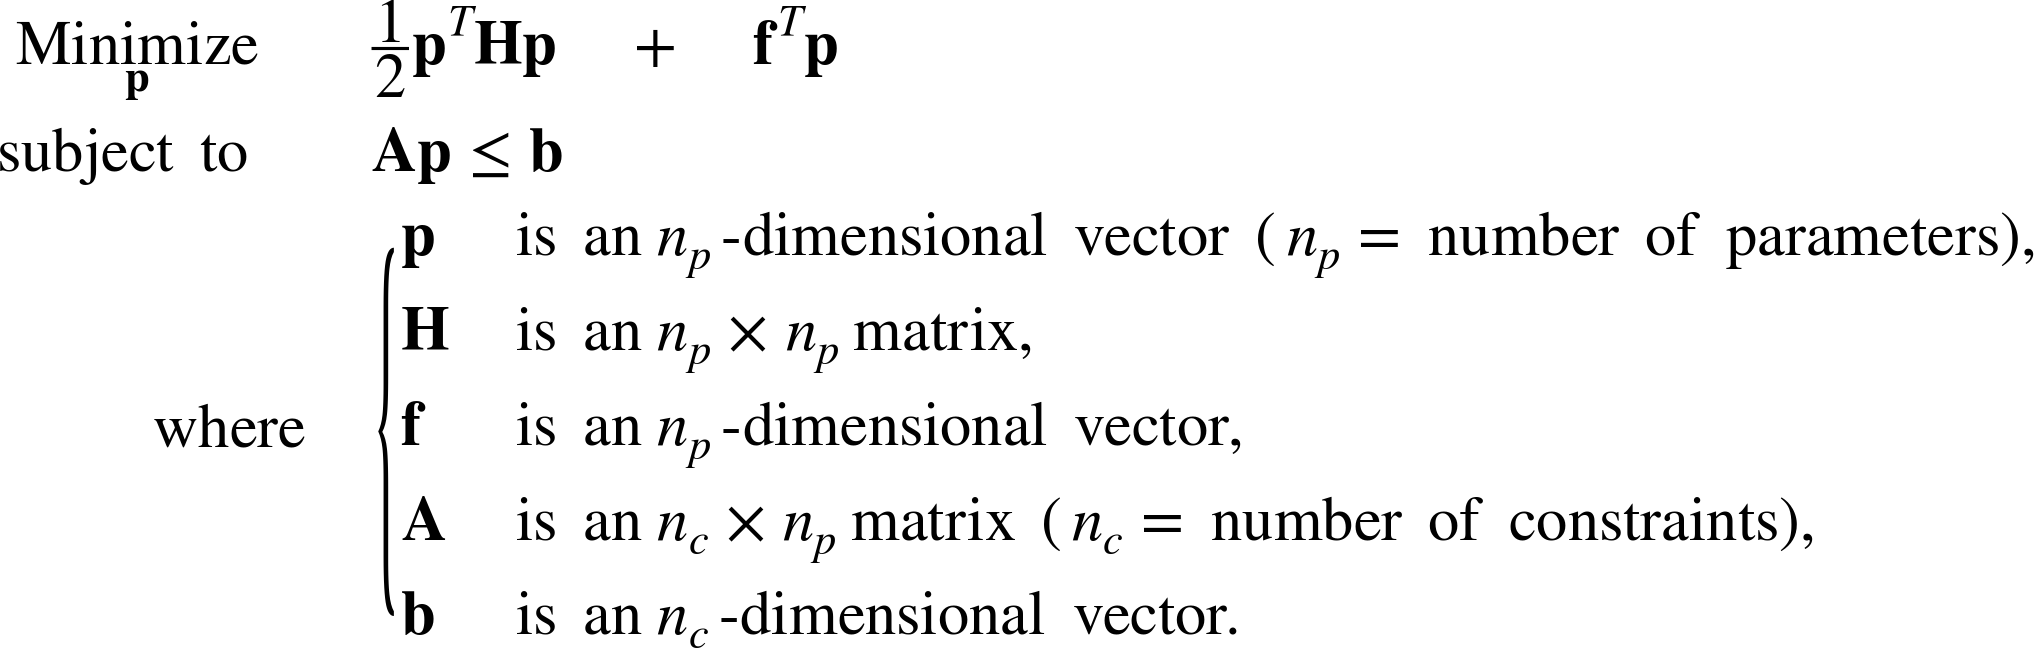

Pass off-the-shelf solver the following parameters:

- $n_{p} = n+1$ : _n_ features and +1 for bias 
- $n_{c} = m$ : _m_ instances
- $\textbf{H} = n_{p} \times n_{p}$
- $\textbf{f} = \textbf{0}$ is the dimension of $n_{p}$
- $\textbf{b} = \textbf{-1}$ : dimension of $n_{c}$
- $\textbf{a}^{(i)} = -t^{(i)} \textbf{X}^{(i)}$: $\textbf{x}^{(i)}$ w/ extra bias feature 

### The Dual Problem

**Dual Problem**: Expressing a related problem whose solution that can give the _lower bound_ of the original constrained optimization problem. SVM problem will even give the _same solutions_ as original optimization problem.

Dual form:

$$ \boxed{ \min\limits_{\alpha} \frac{1}{2} \left[ \sum_{i=1}^{m} \sum_{j=1}^{m} \left( \alpha^{(i)} \alpha^{(j)} t^{(i)} t^{(j)} \textbf{x}^{(i)^T} \textbf{x}^{(j)} \right) \right] - \left[ \sum_{i=1}^{m} \left( \alpha^{(i)} \right) \right] \\
\text{subject to} \, \alpha^{(i)} \geq 0 \, \text{for} \, i=1, 2, ... , m } $$

Finding $\hat{\alpha}$ that minimizes this equation (using QP solver) gives enough to compute $\hat{\textbf{w}}$ and $\hat{b}$ of originial problem:

$$ \hat{\textbf{w}} = \sum_{i=1}^{m} \hat{\alpha}^{(i)} t^{(i)} \textbf{x}^(i) $$

$$ \hat{b} = \frac{1}{n_{s}} \sum_{i=1 \\ \hat{\alpha}^{(i)} \gt 0}^{m} \left( t^{(i)} - \hat{\textbf{w}}^{T} \textbf{x}^{(i)} \right) $$

**Dual problem is faster to solve when training instances smaller than number of features**

### Kernalized SVM

- Applying 2nd degree polynomial transformation to training set
- After this, a linear SVM classifier on transformed training set.
- What polynomial mapping function $\phi$?

$$ \phi(\textbf{x}) = \phi \left( \begin{bmatrix} x_{1} \\ x_{2} \end{bmatrix} \right) =  \begin{bmatrix} x_{1}^{2} \\ \sqrt{2}x_{1}x_{2} \\ x_{2}^{2} \end{bmatrix}$$

- Go to 3 dimensional from 2 dimensions.
- Look at the case of two instances of this polynomial mapping function:

$$ \phi(\textbf{a})^{T} \phi(\textbf{b}) = \\ \begin{bmatrix} a_{1}^{2} \\ \sqrt{2}a_{1}a_{2} \\ a_{2}^{2} \end{bmatrix} \begin{bmatrix} b_{1}^{2} \\ \sqrt{2}b_{1}b_{2} \\ b_{2}^{2} \end{bmatrix} = \\
a_{1}^{2}b_{1}^{2} + 2a_{1}a_{2}b_{1}b_{2} + a_{2}^{2}b_{2}^{2} = \\
\left( a_{1}b_{1} + a_{2}b_{2} \right)^{2} = \\
\left( \begin{bmatrix} a_{1} \\ a_{2} \end{bmatrix}^{T} \begin{bmatrix} b_{1} \\ b_{2} \end{bmatrix} \right)^{2} = \\
\left( \textbf{a}^{T}\textbf{b} \right)^{2} $$

- Apply this transformation to every instance?
- Transform the transformation function to the dot product of the features of the instances and square the result.
- Will be strictly the same as transforming entire dataset and fitting linear SVM.

_Second Degree Polynomial Kernel_: The function that is defined as $K(\textbf{a}, \textbf{b}) = (\textbf{a}^{T}\textbf{b})^{2}$.

**Kernel**: Function capable of computing dot product based on original vectors without going through transformation $\phi$. Other useful _kernels_ include...
- Linear: $K_lin(\textbf{a}, \textbf{b}) = (\textbf{a}^{T}\textbf{b})$
- Polynomial: $K_poly(\textbf{a}, \textbf{b}) = (\gamma\textbf{a}^{T}\textbf{b} + r)^{d}$
- Gaussian RBF: $K_GRBF(\textbf{a}, \textbf{b}) = e^{(-\gamma\||\textbf{a} - \textbf{b}||^{2})}$
- Sigmoid: $K_{sigmoid}(\textbf{a}, \textbf{b}) = \tanh{(\gamma\textbf{a}^{T}\textbf{b} + r)}$



But, if the number of dimensions of the weight vector is going to be huge, won't it still take forever to make a decision? How do we solve for the expression of the decision function if we still need $\hat{\textbf{w}}$? Plug in dual problem solution to weight vector into the decision function for a new instance (uses only dot products):

**Making predicitons with kernels**:

$$h_{\hat{\textbf{w}},\hat{b}}\left( \phi(\textbf{x}^{(n)}) \right) = \\
\hat{\textbf{w}}^{T} \phi(\textbf{x}^{(n)}) + \hat{b} = \\
\left[ \sum_{i=1}^{m} \hat{\alpha}^{(i)}t^{(i)} \phi(\textbf{x}^{(n)} \right]^{T} \phi(\hat{\textbf{x}}^{(n)}) + \hat{b} = \\
\sum_{i=1}^{m} \hat{\alpha}^{(i)}t^{(i)}\left( \phi({\textbf{x}}^{(i)})^{T} \phi({\textbf{x}}^{(n)}) \right) +\hat{b} = ... $$
$$
\\
\boxed{
h_{\hat{\textbf{w}},\hat{b}}\left( \phi(\textbf{x}^{(n)}) \right) = \sum_{i=1}^{m} \hat{\alpha}^{(i)}t^{(i)}K(\textbf{x}^{(i)}, \textbf{x}^{(n)}) + \hat{b}
}
$$ 

Recall, $\alpha^{(i)} \neq 0$ only for support vectors. We only compute dot product of new instance with support vectors (not all training instances). 

Bias term is found in the same way:

$$ \hat{b} = \frac{1}{n_{s}} \sum_{i=1 \\ \hat{\alpha}^{(i)} \gt 0}^{m} \left( t^{(i)} - \hat{\textbf{w}}^{T} \phi(\textbf{x}^{(i)}) \right) = \\
\sum_{i=1 \\ \hat{\alpha}^{(i)} \gt 0}^{m} \left[ t^{(i)} - \left( \sum_{j=1}^{m} \hat{\alpha}^{(i)}t^{(i)} \left( \phi({\textbf{x}}^{(j)})^{T} \phi({\textbf{x}}^{(n)}) \right) \right) \right] = ...\\
$$

$$ 
\boxed{ \hat{b} = \sum_{i=1 \\ \hat{\alpha}^{(i)} \gt 0}^{m} \left[ t^{(i)} - \left( \sum_{j=1}^{m} \hat{\alpha}^{(i)}t^{(i)}K(\textbf{x}^{(i)}, \textbf{x}^{(j)}) \right) \right]
}
$$

### Quick Look at Online SVM Classifiers

- Online = learning as new instances arrive
- Can use Gradient Descent for linear SVM classifiers
 - _SGDClassifier_ class
- Minimize **Linear SVM Classifier Cost Function**:

$$
J(\textbf{w},b) = \frac{1}{2}\textbf{w}^{T}\textbf{w} + C\sum_{i=1}^{m}\max(0, 1-t^{(i)}(\textbf{w}^T\textbf{x}^{(i)} + b)
$$

- First term: pushing small weight vector
- Second term: Sum of all greatest margin violations (0 off the street and on correct side, else it is proportional to distance to correct side).


***
***
## Exercises for Chapter 5

***

### 5.9 SVM Classifier with MNIST dataset.

SVM Classifiers are binary classifiers. Can you train a one-v.-all classifier for all 10 digits? What hyperparameters will you tune? What accuracy can you reach?

***

#### Importing MNIST

We will start off by looking into work done in Ch. 3. No need to reinvent the wheel. We can reuse how we imported the MNIST dataset. This was taken from Geron's book, but an exception was made to change the directory to the current working directory (CWD) and to make a new folder in it called "datasets", if it hasn't been made already.

In [3]:
import os
from sklearn.datasets import fetch_openml

# Currently, my H: drive is acting up. Enter your CWD here...
mnist_path = os.path.join(os.getcwd(), "datasets")

# Create the new directory if it doesn't exist
if not os.path.exists(mnist_path):
    os.mkdir(mnist_path)
    print("Directory " , mnist_path ,  " Created ")
else:    
    print("Directory " , mnist_path ,  " already exists")

mnist = fetch_openml('mnist_784', version=1, data_home=mnist_path)
mnist.keys()

Directory  C:\Users\csmith657\Documents\GitHub\geron-ml-exercises\Ch5_Support_Vector_Machines\datasets  already exists


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

##### Splitting Training and Test Sets

Since MNIST is apparently already shuffled for us, we can split it up just as we did in Ch. 3. 

In [4]:
import numpy as np

# Grab the MNIST data
X, y = mnist["data"], mnist["target"]

# Change the targets from strings to integers
y = y.astype(np.uint8)

# Split the training and test sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#### Linear Classification 

##### Training Linear SVM - One v. All

We will try the Linear SVM method first with a OvA strategy. We can see how long it takes!

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# LINEAR SVM ATTEMPT - One v. All Strategy
# Import the class from Scikit-Learn
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsRestClassifier


# Create the pipeline to scale the data
lin_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge")),
    ])

# Train the One v. All Classifier
ovr_clf = OneVsRestClassifier(lin_svm_clf)
ovr_clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

OneVsRestClassifier(estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))]),
          n_jobs=None)

##### Implementing Cross Validation

We will use a prewritten crossvalidation function to see if the training does well!

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(ovr_clf, X_train, y_train, cv=3, scoring='accuracy')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

array([0.90361928, 0.90709535, 0.90803621])

#### Training Linear SVM - One v. One

Since OvO is recommended with SVMs, we will also train one of those!

In [6]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(lin_svm_clf)
ovo_clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

OneVsOneClassifier(estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear_svc', LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='hinge', max_iter=1000, multi_class='ovr',
     penalty='l2', random_state=None, tol=0.0001, verbose=0))]),
          n_jobs=None)

##### Implementing Cross Validation

Same as above, we will use cross-validation...

In [8]:
cross_val_score(ovo_clf, X_train, y_train, cv=3, scoring='accuracy')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", 

array([0.91641672, 0.9159958 , 0.91848777])

#### Improving OvO Model

~91% isn't too bad for a first attempt! That being said, we want to be able to tune the hyperparameters such that 